In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = Path('../data/interim/raw_df.pkl').resolve()
df_raw = pd.read_pickle(path)
df_raw.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
Date_Time,,,,,,,,,,,,,,,,,
2017-12-22 10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
2017-12-22 10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2017-12-22 10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
2017-12-22 10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
2017-12-22 10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
# create envelopes for temp, light, sound and pir
df = pd.DataFrame(
    index=df_raw.index,    
)
df['mintemp'] = df_raw[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']].min(axis=1)
df['maxtemp'] = df_raw[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']].max(axis=1)
df['minlight'] = df_raw[['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light']].min(axis=1)
df['maxlight'] = df_raw[['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light']].max(axis=1)
df['minsound'] = df_raw[['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound']].min(axis=1)
df['maxsound'] = df_raw[['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound']].max(axis=1)
df['minpir'] = df_raw[['S6_PIR', 'S7_PIR']].min(axis=1)
df['maxpir'] = df_raw[['S6_PIR', 'S7_PIR']].max(axis=1)
df['co2'] = df_raw['S5_CO2']
df['co2slope'] = df_raw['S5_CO2_Slope']
df['target'] = df_raw['Room_Occupancy_Count']
df['target_bin'] = (df['target'] > 0).astype(int)
df.head()

,mintemp,maxtemp,minlight,maxlight,minsound,maxsound,minpir,maxpir,co2,co2slope,target,target_bin
Date_Time,,,,,,,,,,,,
2017-12-22 10:49:41,24.56,25.38,34,121,0.06,0.19,0,0,390,0.769231,1,1
2017-12-22 10:50:12,24.56,25.44,33,121,0.05,0.93,0,0,390,0.646154,1,1
2017-12-22 10:50:42,24.50,25.44,34,121,0.06,0.43,0,0,390,0.519231,1,1
2017-12-22 10:51:13,24.56,25.44,34,121,0.09,0.41,0,0,390,0.388462,1,1
2017-12-22 10:51:44,24.56,25.44,34,121,0.06,0.18,0,0,390,0.253846,1,1


In [4]:
df2 = df.iloc[400:1200, :]

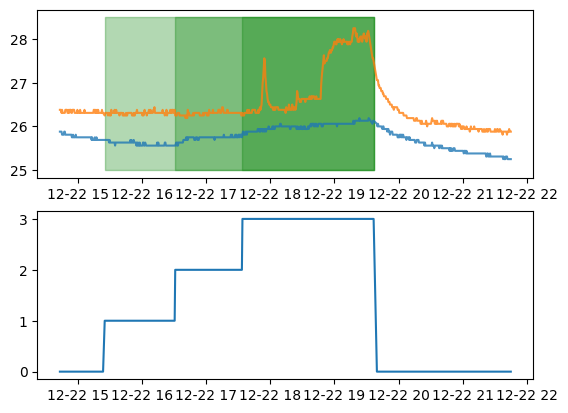

In [5]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df2.mintemp, label='mintemp', alpha=0.8)
ax[0].plot(df2.maxtemp, label='maxtemp', alpha=0.8)

ax[1].plot(df2.target, label='target')

ax[0].fill_between(df2.index, 25, 28.5, where=df2.target > 0, alpha=0.3, color='green')
ax[0].fill_between(df2.index, 25, 28.5, where=df2.target > 1, alpha=0.3, color='green')
ax[0].fill_between(df2.index, 25, 28.5, where=df2.target > 2, alpha=0.3, color='green')

plt.show()

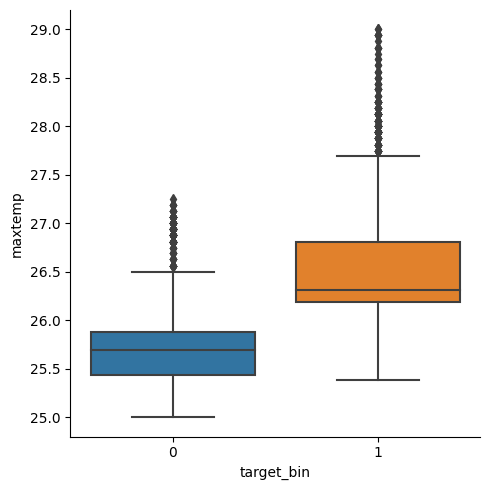

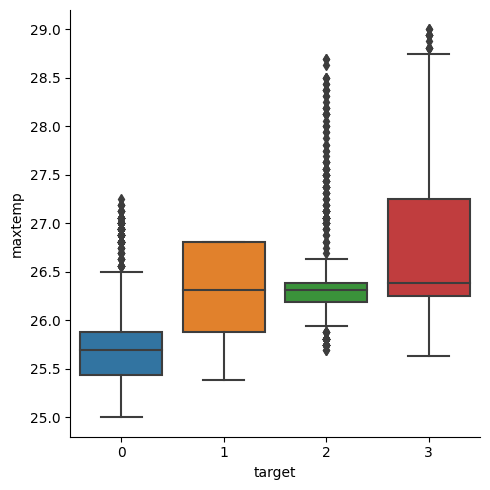

In [6]:
sns.catplot(data=df, x="target_bin", y="maxtemp", kind="box")
sns.catplot(data=df, x="target", y="maxtemp", kind="box")

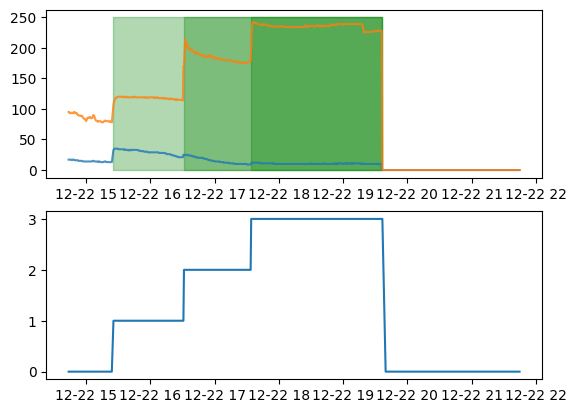

In [7]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df2.minlight, label='minlight', alpha=0.8)
ax[0].plot(df2.maxlight, label='maxlight', alpha=0.8)

ax[1].plot(df2.target, label='target')

ax[0].fill_between(df2.index, 0, 250, where=df2.target > 0, alpha=0.3, color='green')
ax[0].fill_between(df2.index, 0, 250, where=df2.target > 1, alpha=0.3, color='green')
ax[0].fill_between(df2.index, 0, 250, where=df2.target > 2, alpha=0.3, color='green')

plt.show()

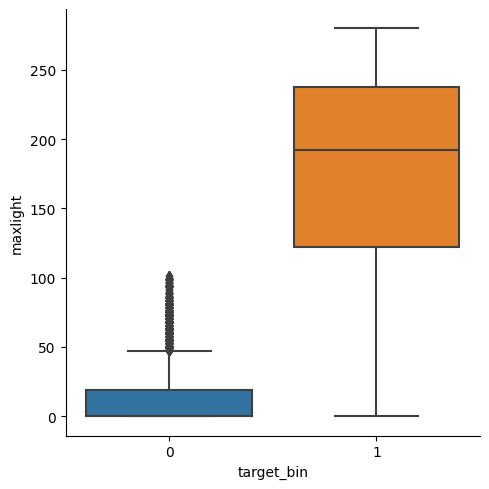

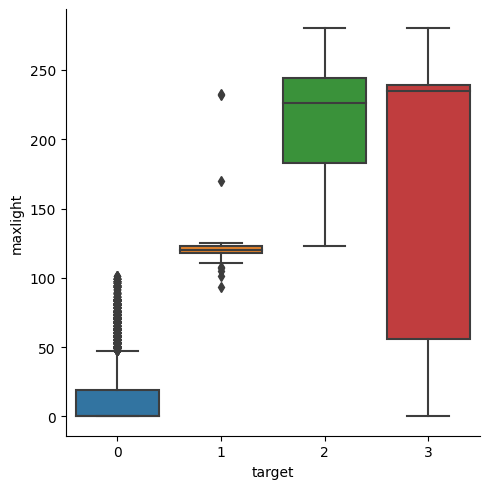

In [8]:
sns.catplot(data=df, x="target_bin", y="maxlight", kind="box")
sns.catplot(data=df, x="target", y="maxlight", kind="box")

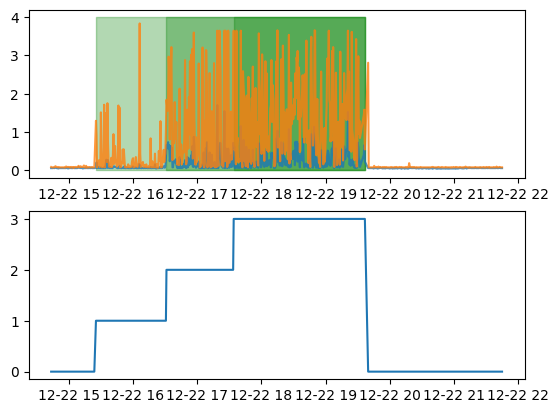

In [9]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df2.minsound, label='minsound', alpha=0.8)
ax[0].plot(df2.maxsound, label='maxsound', alpha=0.8)

ax[1].plot(df2.target, label='target')

ax[0].fill_between(df2.index, 0, 4, where=df2.target > 0, alpha=0.3, color='green')
ax[0].fill_between(df2.index, 0, 4, where=df2.target > 1, alpha=0.3, color='green')
ax[0].fill_between(df2.index, 0, 4, where=df2.target > 2, alpha=0.3, color='green')

plt.show()

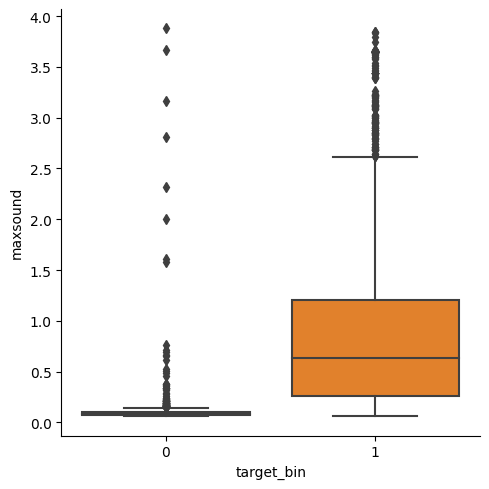

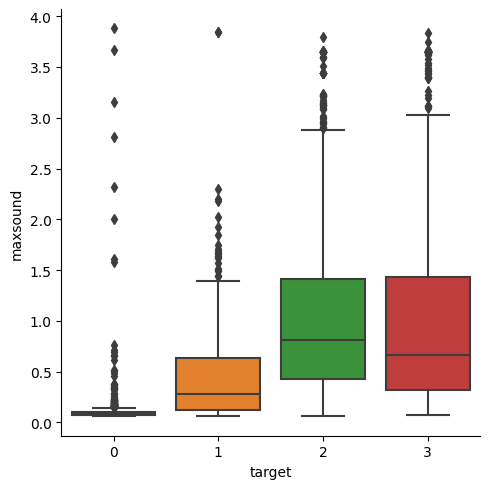

In [10]:
sns.catplot(data=df, x="target_bin", y="maxsound", kind="box")
sns.catplot(data=df, x="target", y="maxsound", kind="box")

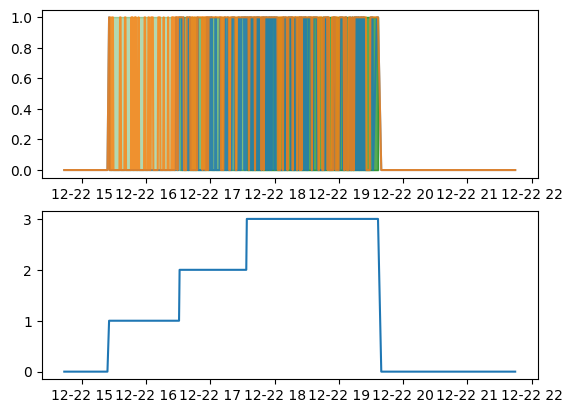

In [11]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df2.minpir, label='minpir', alpha=0.8)
ax[0].plot(df2.maxpir, label='maxpir', alpha=0.8)

ax[1].plot(df2.target, label='target')

ax[0].fill_between(df2.index, 0, 1, where=df2.target > 0, alpha=0.3, color='green')
ax[0].fill_between(df2.index, 0, 1, where=df2.target > 1, alpha=0.3, color='green')
ax[0].fill_between(df2.index, 0, 1, where=df2.target > 2, alpha=0.3, color='green')

plt.show()

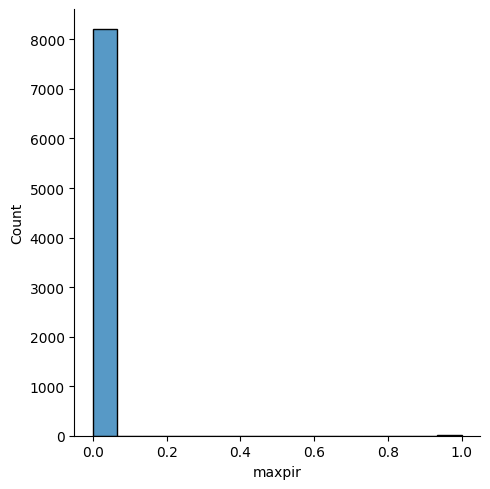

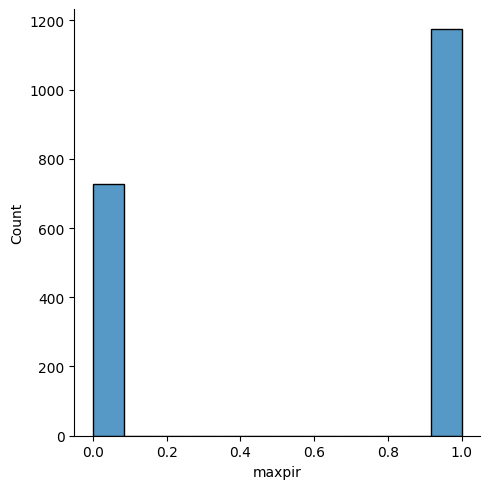

In [12]:
sns.displot(df[df['target_bin']==0], x='maxpir')
sns.displot(df[df['target_bin']==1], x='maxpir')

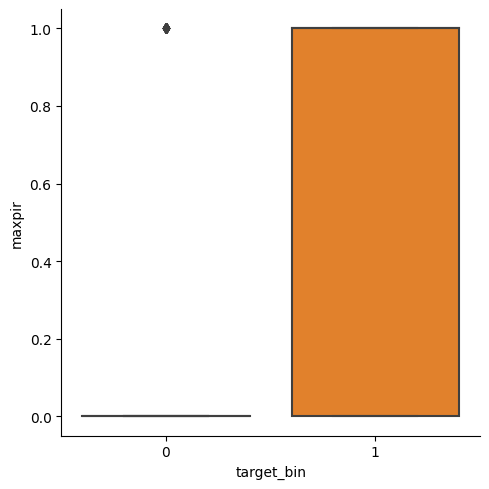

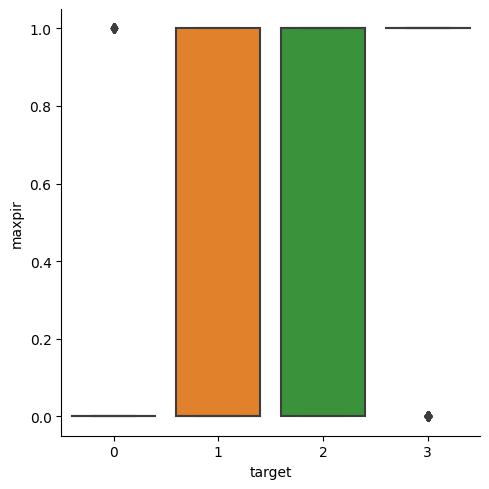

In [13]:
sns.catplot(data=df, x="target_bin", y="maxpir", kind="box")
sns.catplot(data=df, x="target", y="maxpir", kind="box")

# Principal Component Analysis

In [14]:
from sklearn.decomposition import PCA

X = df.iloc[:, :-1]

pca = PCA().fit(X)

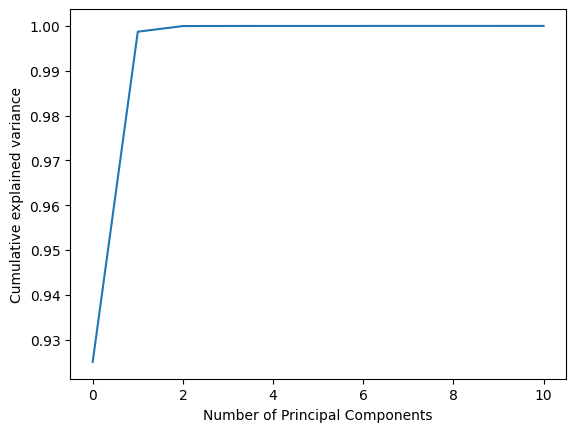

In [15]:
# plot the cumulative variance explained by all the principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance')
plt.show()

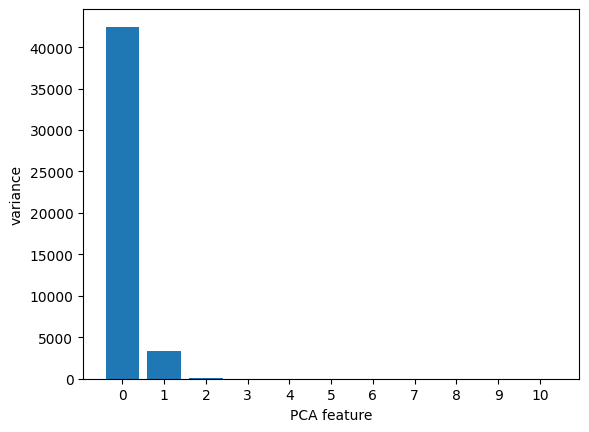

In [16]:
# plot individual variances (scree plot)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

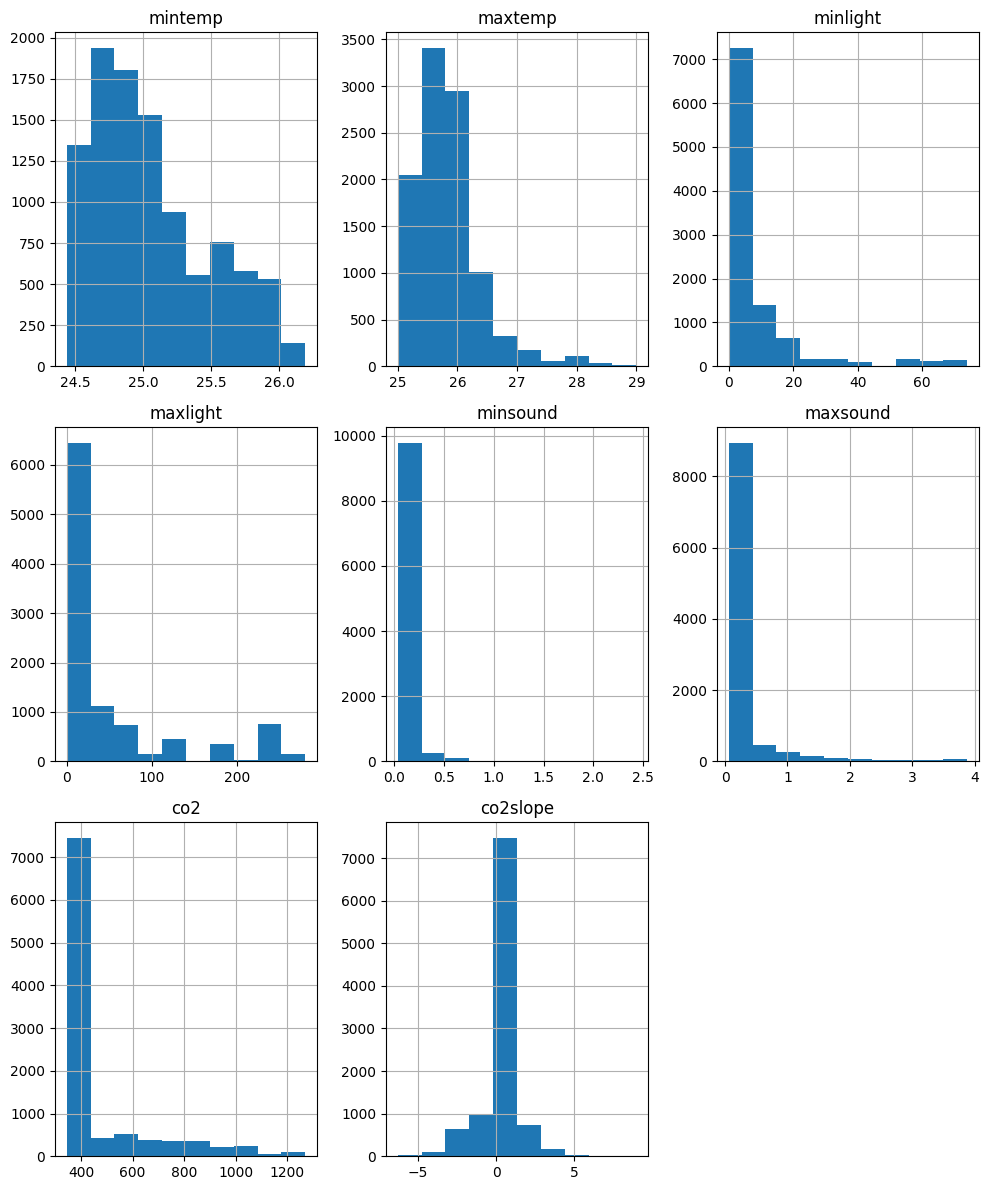

In [17]:
numericals = df[['mintemp', 'maxtemp', 'minlight', 'maxlight', 'minsound', 'maxsound', 'co2', 'co2slope']]

numericals.hist(figsize=(10,12))
plt.tight_layout()
plt.show()

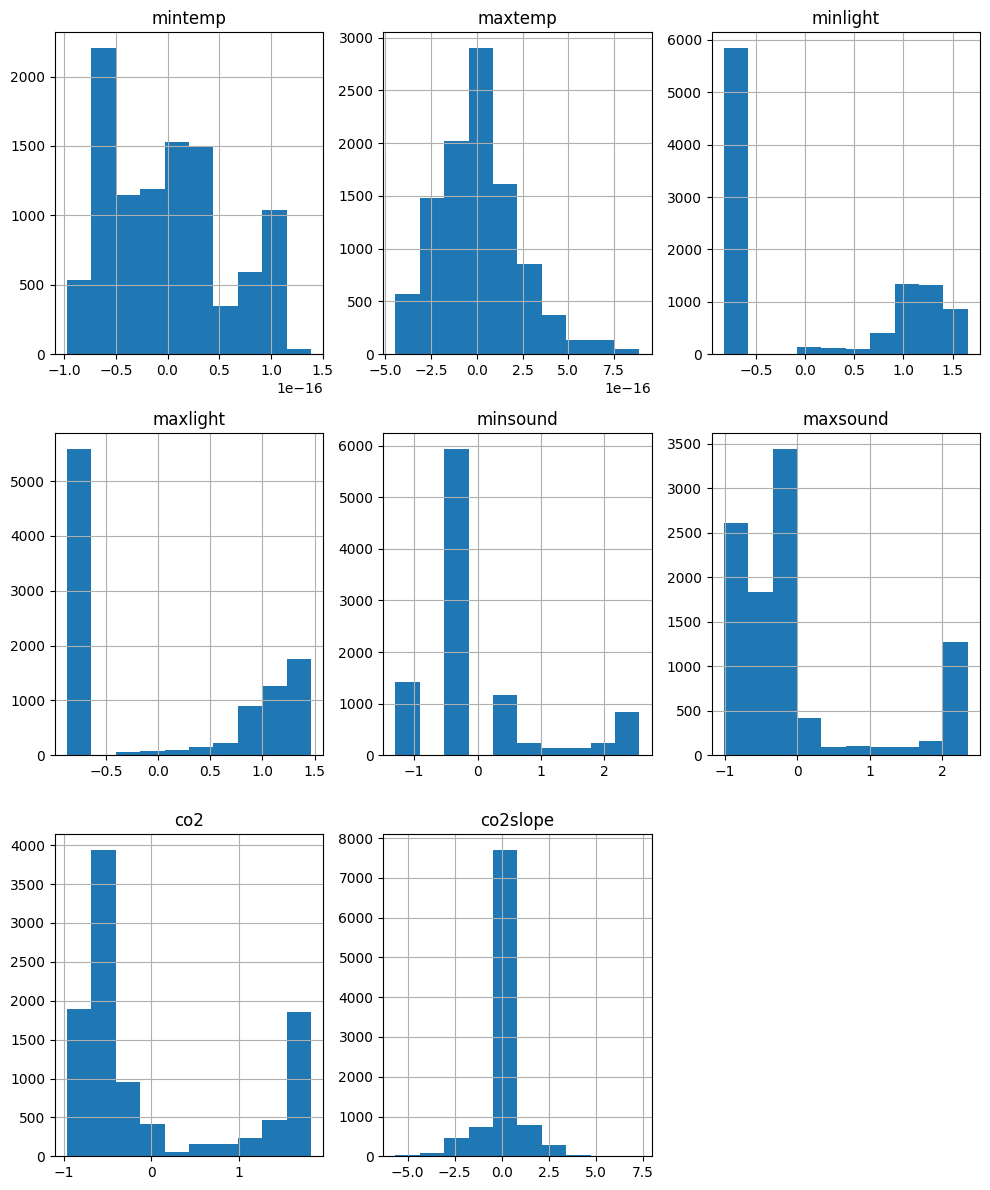

In [24]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
numericals_transformed = pt.fit_transform(numericals)
numericals_transformed = pd.DataFrame(numericals_transformed, columns=numericals.columns)
numericals_transformed
numericals_transformed.hist(figsize=(10,12))
plt.tight_layout()
plt.show()